In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset - using the verified correct path
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv')

# Select specific columns
df = df[['Pclass', 'Sex', 'Age', 'Survived']]

# Display the first few rows
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pclass  Sex   Age  Survived
0       3    0  22.0         0
1       1    1  38.0         1
2       3    1  26.0         1
3       1    1  35.0         1
4       3    0  35.0         0


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size=0.3, random_state=0)

In [ ]:
print('[X_train]\n',X_train.head())
print('[y_train]\n',y_train.head())
print('[X_test]\n',X_test.head())
print('[y_test]\n',y_test.head())

[X_train]
      Pclass  Sex        Age
857       1    0  51.000000
52        1    1  49.000000
386       3    0   1.000000
124       1    0  54.000000
578       3    1  29.699118
[y_train]
 857    1
52     1
386    0
124    0
578    0
Name: Survived, dtype: int64
[X_test]
      Pclass  Sex        Age
495       3    0  29.699118
648       3    0  29.699118
278       3    0   7.000000
31        1    1  29.699118
255       3    1  29.000000
[y_test]
 495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64


In [ ]:
df

,Pclass,Sex,Age,Survived
0,3,0,22.000000,0
1,1,1,38.000000,1
2,3,1,26.000000,1
3,1,1,35.000000,1
4,3,0,35.000000,0
...,...,...,...,...
886,2,0,27.000000,0
887,1,1,19.000000,1
888,3,1,29.699118,0
889,1,0,26.000000,1


from matplotlib import pyplot as plt
df['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sex'].plot(kind='hist', bins=20, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Pclass', y='Sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sex', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Survived', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Pclass'].plot(kind='line', figsize=(8, 4), title='Pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sex'].plot(kind='line', figsize=(8, 4), title='Sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Survived'].plot(kind='line', figsize=(8, 4), title='Survived')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
import sklearn.model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(['Survived'], axis=1), df['Survived'], test_size=0.3, random_state=0)

In [ ]:
print('[X_train]\n',X_train.head())
print('[y_train]\n',y_train.head())
print('[X_test]\n',X_test.head())
print('[y_test]\n',y_test.head())

[X_train]
      Pclass  Sex        Age
857       1    0  51.000000
52        1    1  49.000000
386       3    0   1.000000
124       1    0  54.000000
578       3    1  29.699118
[y_train]
 857    1
52     1
386    0
124    0
578    0
Name: Survived, dtype: int64
[X_test]
      Pclass  Sex        Age
495       3    0  29.699118
648       3    0  29.699118
278       3    0   7.000000
31        1    1  29.699118
255       3    1  29.000000
[y_test]
 495    0
648    0
278    0
31     1
255    1
Name: Survived, dtype: int64


In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Model Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))

Model Accuracy: 0.7985074626865671
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.74      0.70      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



[[144  24]
 [ 30  70]]


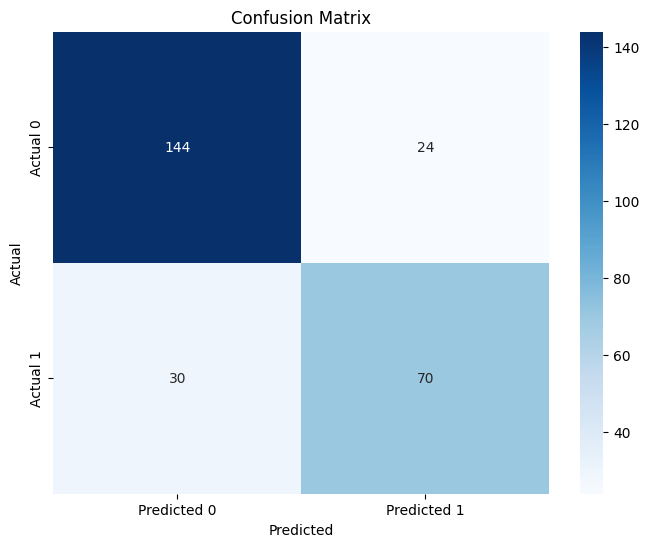

In [ ]:
# prompt: confusion matrix

cm = confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


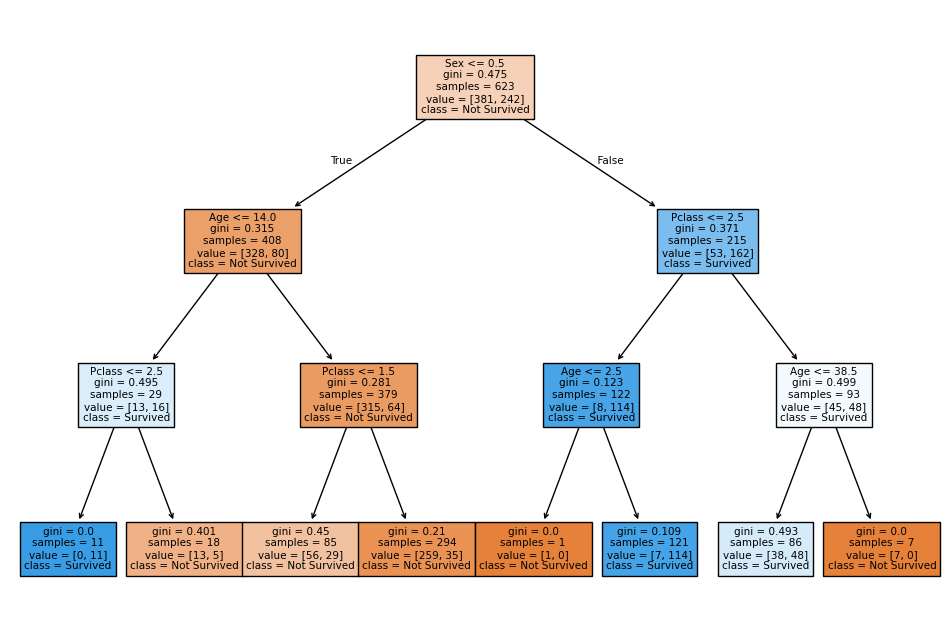

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=1)  # Example with 100 trees

In [ ]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ... (Your existing code for data loading and preparation) ...

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_predict = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predict)
print(f'Model Accuracy: {accuracy}')
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

# ... (Your existing code for visualization, if desired) ...

Model Accuracy: 0.7611940298507462
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       168
           1       0.68      0.67      0.68       100

    accuracy                           0.76       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.76      0.76      0.76       268

[[137  31]
 [ 33  67]]


In [ ]:
estimators = model.estimators_

[[137  31]
 [ 33  67]]


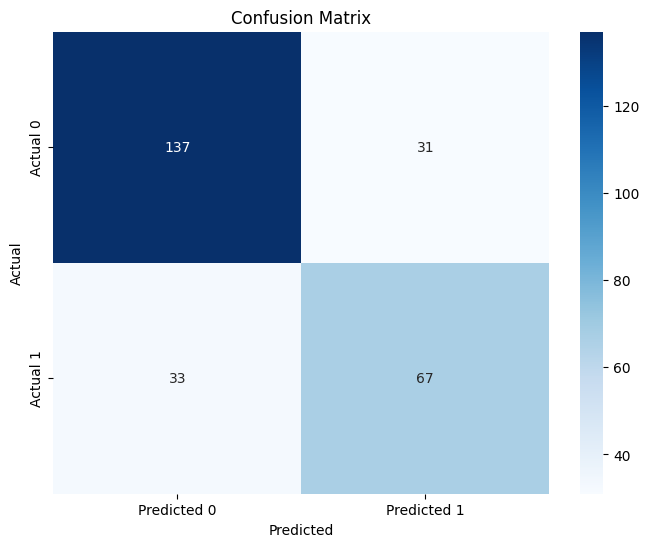

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_predict defined

cm = confusion_matrix(y_test, y_predict)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

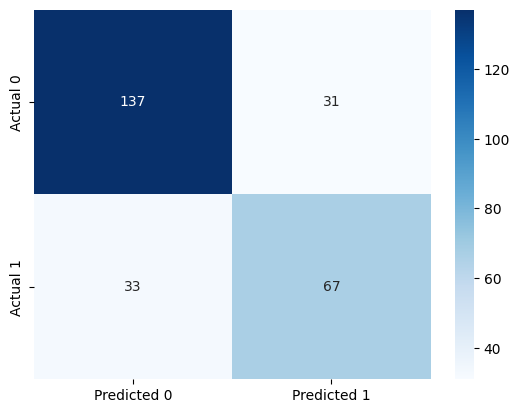

In [ ]:
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

In [ ]:
feature_importances = model.feature_importances_

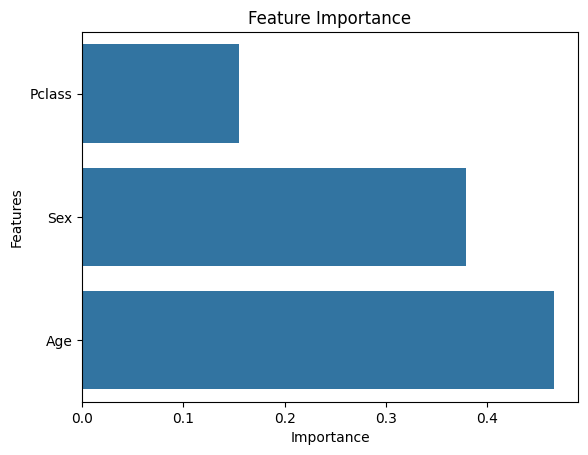

In [ ]:
sns.barplot(x=feature_importances, y=X_train.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()